In [54]:
import pandas 

# create header names because the csv file doesnt have any
headers = ["# of Times Pregnant","Plasma Glucose Concentration","Diastolic Blood Pressure (mm Hg)","Triceps Skin Fold Thickness (mm)","2-Hour Serum Insulin (mm U/ml","Body Mass Index (kg/m2)", "Diabetes Pedigree Function", "Age (years)","Diabetes?"]

# save data 
data = pandas.read_csv("C:/Users/raisa/OneDrive/Desktop/diabetes.csv", names = headers) 

# print first 10 rows of data
data.head(10)



# of Times Pregnant  Plasma Glucose Concentration  \
0                    6                           148   
1                    1                            85   
2                    8                           183   
3                    1                            89   
4                    0                           137   
5                    5                           116   
6                    3                            78   
7                   10                           115   
8                    2                           197   
9                    8                           125   

   Diastolic Blood Pressure (mm Hg)  Triceps Skin Fold Thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   
4                                40                                35   
5                                74                                 0   
6                                50                                32   
7                                 0                                 0   
8                                70                                45   
9                                96                                 0   

   2-Hour Serum Insulin (mm U/ml  Body Mass Index (kg/m2)  \
0                              0                     33.6   
1                              0                     26.6   
2                              0                     23.3   
3                             94                     28.1   
4                            168                     43.1   
5                              0                     25.6   
6                             88                     31.0   
7                              0                     35.3   
8                            543                     30.5   
9                              0                      0.0   

   Diabetes Pedigree Function  Age (years)  Diabetes?  
0                       0.627           50          1  
1                       0.351           31          0  
2                       0.672           32          1  
3                       0.167           21          0  
4                       2.288           33          1  
5                       0.201           30          0  
6                       0.248           26          1  
7                       0.134           29          0  
8                       0.158           53          1  
9                       0.232           54          1

<AxesSubplot:>

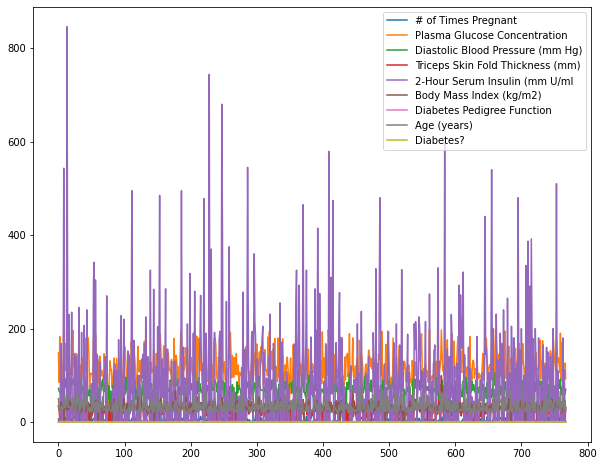

In [55]:
data.plot(figsize=(10,8)) # plot data


In [56]:
training_data = data.sample(frac=0.8, random_state=42)  # divide the data into testing and training
test_data = data.drop(training_data.index) 


In [57]:
training_label = training_data.pop("Diabetes?") # take out variable that indicates if the individual had diabetes or not from training and test data
test_label = test_data.pop("Diabetes?")

# clarify which rows are in training and test data
training_data = training_data[["# of Times Pregnant","Plasma Glucose Concentration","Diastolic Blood Pressure (mm Hg)","Triceps Skin Fold Thickness (mm)","2-Hour Serum Insulin (mm U/ml","Body Mass Index (kg/m2)", "Diabetes Pedigree Function", "Age (years)"]]
test_data = test_data[["# of Times Pregnant","Plasma Glucose Concentration","Diastolic Blood Pressure (mm Hg)","Triceps Skin Fold Thickness (mm)","2-Hour Serum Insulin (mm U/ml","Body Mass Index (kg/m2)", "Diabetes Pedigree Function", "Age (years)"]]



In [58]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# create decision tree and random forest model
decision_tree_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10)
random_forest_model = RandomForestClassifier(random_state=42, min_samples_leaf=10)
# train the two models with the data defined earlier
decision_tree_model.fit(training_data, training_label)
random_forest_model.fit(training_data, training_label)


RandomForestClassifier(min_samples_leaf=10, random_state=42)

In [59]:

from sklearn.metrics import accuracy_score
# predict using decision tree 
y_pred_1 = decision_tree_model.predict(test_data)
# calculate accuracy
accuracy_1 = accuracy_score(test_label,y_pred_1)
# predict using random forest model
y_pred_2 = random_forest_model.predict(test_data)
#calculate accuracy
accuracy_2 = accuracy_score(test_label,y_pred_2)

#print both calculated accuracy values
print(accuracy_1)
print(accuracy_2)


0.7597402597402597
0.7142857142857143


In [60]:

estimator = random_forest_model.estimators_[5] # pull out decision tree

from sklearn.tree import export_graphviz

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ["# of Times Pregnant","Plasma Glucose Concentration","Diastolic Blood Pressure (mm Hg)","Triceps Skin Fold Thickness (mm)","2-Hour Serum Insulin (mm U/ml","Body Mass Index (kg/m2)", "Diabetes Pedigree Function", "Age (years)"],
                class_names = ["True", "False"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)


from subprocess import check_call

check_call(['dot', '-Tpng', 'tree.dot', '-o', 'tree1.png', '-Gdpi=600'])


# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')
